# Introduction to Finding Disney Problem Statement
Our approach - In order to classify different Disney characters, we need a classification model based on CNNs. We have used Google's Tensorflow as the DL framework as it supports the high level Keras API. Tensorflow Hub was used to fetch mobilenet_v2. We added a layer to suit our need and retrained the model.

Data organization - Upon having a look at the dataset we found few corrupt files, images containing both Mickey and Donald and similar noisy data, thus we could not use the dataset available on kaggle and had to re-upload the dataset with the change. All the images were converted to a size 224\*224 including training and test data. The dataset didn't had augmented images so we have to do it.

## **1. Importing Necessary Libraries 🧾**

In [1]:
# Necessary utility modules and libraries
import os
import shutil
import pathlib
import random
import datetime
# Plotting libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import ImageFile, Image
import cv2
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Libraries for building the model
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from keras.models import Sequential
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install gdown

  Installing build dependencies ... - \ | / done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
  Created wheel for gdown: filename=gdown-4.5.3-py3-none-any.whl size=14821 sha256=6c1ec45a1c2f48e50ab625db5746d9b89935fd908c3b26abe72933fb90d52c9e
  Stored in directory: /root/.cache/pip/wheels/94/8d/0b/bdcd83555c3555f91a33f6c2384428d9f163c7d75ab0d272b4
Successfully built gdown


## **2. Downloading the dataset from Google Drive ☁️**

In [3]:
!gdown --id 1rkhzvsXYfpNFufYbmTWABtS6kxozevjB

/opt/conda/lib/python3.7/site-packages/gdown/cli.py:125: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1rkhzvsXYfpNFufYbmTWABtS6kxozevjB
To: /kaggle/working/disney.zip
100%|███████████████████████████████████████| 76.1M/76.1M [00:00<00:00, 287MB/s]


In [4]:
!unzip disney.zip

Archive:  disney.zip
   creating: disney/test/
   creating: disney/test/test/
  inflating: disney/test/test/10182.jpg  
  inflating: disney/test/test/10641.jpg  
  inflating: disney/test/test/10871.jpg  
  inflating: disney/test/test/11295.jpg  
  inflating: disney/test/test/11316.jpg  
  inflating: disney/test/test/11778.jpg  
  inflating: disney/test/test/11875.jpg  
  inflating: disney/test/test/11916.jpg  
  inflating: disney/test/test/11918.jpg  
  inflating: disney/test/test/12195.jpg  
  inflating: disney/test/test/12244.jpg  
  inflating: disney/test/test/12400.jpg  
  inflating: disney/test/test/12435.jpg  
  inflating: disney/test/test/12687.jpg  
  inflating: disney/test/test/12760.jpg  
  inflating: disney/test/test/12968.jpg  
  inflating: disney/test/test/13234.jpg  
  inflating: disney/test/test/13428.jpg  
  inflating: disney/test/test/13510.jpg  
  inflating: disney/test/test/13519.jpg  
  inflating: disney/test/test/14054.jpg  
  inflating: disney/test/test/14088.jpg 

## **3. Fixing Data format and path 🔧**

In [5]:
train_path = "disney/train/train"
test_path = "disney/test/test"
batch_size = 32
img_height = 224
img_width = 224

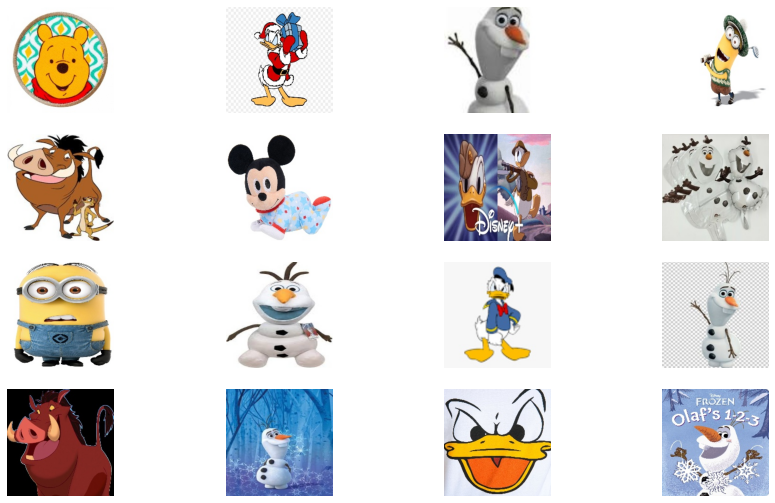

In [6]:
images = []
for folder in os.listdir(train_path):
  for image in os.listdir(train_path + '/' + folder):
    images.append(os.path.join(train_path, folder, image))

plt.figure(1, figsize=(15, 9))
plt.axis('off')
n = 0
for i in range(16):
  n += 1
  random_img = random.choice(images)
  imgs = cv2.imread(random_img)
  plt.subplot(4, 4, n)
  plt.axis('off')
  rgb = cv2.cvtColor(imgs, cv2.COLOR_BGR2RGB)
  plt.imshow(rgb)

plt.show()

## **4. Image Augmentation 🔁**

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=.2,zoom_range=.2,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
training_set = train_datagen.flow_from_directory(train_path,target_size=(img_height,img_width),batch_size=batch_size,color_mode="rgb",
                                                 class_mode='categorical',shuffle=True,subset='training')
test_set = test_datagen.flow_from_directory("disney/test",target_size=(img_height,img_width),
                                            batch_size=batch_size, shuffle=False,color_mode="rgb",class_mode=None)


Found 3226 images belonging to 6 classes.
Found 512 images belonging to 1 classes.


## **5. Defining and Training the Model 🤖**

In [9]:
def create_model(model_url, num_classes, img_size=(224,224)):
    '''
    Creates a tensorflow model using the model_url and the no. of different classes.

    model_url: The url of the pretrained tensorflow hub model
    num_classes: The no. of different classes.
    '''
    # Download the pre-trained model and use it as a keras layer
    feature_extraction = hub.KerasLayer(model_url, trainable=False, input_shape=(img_size)+(3,), name="feature_extractor_layer")
    
    # Create our own model
    model = tf.keras.Sequential([
        feature_extraction,
        layers.Dense(num_classes, activation="softmax", name="output_layer")                             
    ])

    # Returns uncompiled model
    return model

In [10]:
# Model URL
mobilenet_v2 = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

# Creating the Efficient-net model
model_mobilenet_v2 = create_model(model_url=mobilenet_v2,num_classes=6)

# Compile the model
model_mobilenet_v2.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

# Summary of the model
model_mobilenet_v2.summary()

2022-11-11 05:49:23.308322: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-11 05:49:23.424966: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-11 05:49:23.425862: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-11 05:49:23.427672: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
feature_extractor_layer (Ker (None, 1001)              5432713   
_________________________________________________________________
output_layer (Dense)         (None, 6)                 6012      
Total params: 5,438,725
Trainable params: 6,012
Non-trainable params: 5,432,713
_________________________________________________________________


In [11]:
def my_gen(gen):
    while True:
        try:
            data, labels = next(gen)
            yield data, labels
        except:
            pass

In [12]:
history = model_mobilenet_v2.fit_generator(my_gen(training_set),epochs=15,steps_per_epoch=len(training_set))

2022-11-11 05:49:29.886001: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15


2022-11-11 05:49:34.279497: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


101/101 [==============================] - 52s 416ms/step - loss: 0.7662 - accuracy: 0.7409
Epoch 2/15
101/101 [==============================] - 43s 427ms/step - loss: 0.2713 - accuracy: 0.9144
Epoch 3/15
101/101 [==============================] - 42s 419ms/step - loss: 0.2060 - accuracy: 0.9371
Epoch 4/15
101/101 [==============================] - 42s 418ms/step - loss: 0.1528 - accuracy: 0.9532
Epoch 5/15
101/101 [==============================] - 43s 426ms/step - loss: 0.1340 - accuracy: 0.9637
Epoch 6/15
101/101 [==============================] - 42s 418ms/step - loss: 0.1273 - accuracy: 0.9600
Epoch 7/15
101/101 [==============================] - 42s 421ms/step - loss: 0.1097 - accuracy: 0.9668
Epoch 8/15
101/101 [==============================] - 42s 417ms/step - loss: 0.1007 - accuracy: 0.9665
Epoch 9/15
101/101 [==============================] - 42s 412ms/step - loss: 0.0903 - accuracy: 0.9752
Epoch 10/15
101/101 [==============================] - 42s 413ms/step - loss: 0.0855

## **6. Generating Predictions 🤔**

In [13]:
predicts = model_mobilenet_v2.predict_generator(test_set, verbose = True)

16/16 [==============================] - 2s 72ms/step


In [14]:
predict = np.argmax(predicts,axis=-1)
label_index = {v: k for k,v in training_set.class_indices.items()}

submit = [label_index[p] for p in predict]

df = pd.DataFrame(columns=['character_id', 'label'])
df['character_id'] = [os.path.basename(x) for x in test_set.filenames]
df['label'] = submit

In [15]:
df['character_id'] = df.character_id.apply(lambda x: x.split('.')[0])

In [16]:
df.head()

,character_id,label
0,10182,pumba
1,10641,donald
2,10871,minion
3,11295,olaf
4,11316,pumba


In [17]:
df.to_csv('submission.csv',index=False)

In [18]:
from IPython.display import HTML
import base64

# function that takes in a dataframe and creates a text link to  
def create_download_link(df, title = "Download CSV file", filename = "submission.csv"):  
    csv = df.to_csv(index=False)
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

# create a random sample dataframe
data = df

# create a link to download the dataframe
create_download_link(data)